# **پیش بینی پیش فرض وام**

----------------------------------------
## **اهداف و اطلاعات**
----------------------------------------

-توانایی شناسایی وام‌های معوقه در حوزه مالی بسیار بحرانی است. با داشتن مجموعه‌ای از ویژگی‌ها در مورد یک فرد، هدف پیش‌بینی این است که آیا فرد مورد نظر وام راپرداخت خواهد کرد یا خیر.
-در این jupyter notebook، قصد داریم به مفاهیم LVC 3 پرداخت کرده و سعی کنیم یک مدل ایجاد کنیم که پیش‌بینی کند که آیا شخص خاصی وام را پرداخت خواهد کرد یا خیر.


--------------------
## **مجموعه داده**
--------------------

مجموعه داده ای که در اختیار داریم حاوی ویژگی های (ستون) زیر می‌باشد:

- **Default** - Yes/No, متغیر وابسته طبقه‌ای که وضعیت پیش‌فرض را نشان می‌دهد.
- **Student** - Yes/No, متغیر مستقل طبقه بندی که نشان می دهد متقاضی دانشجو است یا خیر.
- **Balance** - موجودی حساب متقاضی.
- **Income** - درآمد متقاضی.

## **افزودن کتابخانه ها مورد نیاز**

In [17]:
import pandas as pd

import numpy as np

import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # برای نمایش ندادن هشدار ها

# برای حذف نماد های علمی و نمایش اعداد با دو رقم اعشار
pd.options.display.float_format = '{:,.2f}'.format        

# بروزرسانی تم پیش فرض نمودار ها
sns.set_style(style = 'darkgrid')

### **بارگیری مجموعه داده‌ها(Datasets)**

In [18]:
#  خواندن دیتاست
df = pd.read_csv('Default.csv')

**نمایش 5 سطر ابتدایی داده های موجود در دیتاست**

In [19]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.53,"44,361.63"
1,2,No,Yes,817.18,"12,106.13"
2,3,No,No,"1,073.55","31,767.14"
3,4,No,No,529.25,"35,704.49"
4,5,No,No,785.66,"38,463.50"


In [20]:
# حذف ستون unnamed
# به این خاطر که فقط ایندکس است و کاربردی ندارد

df.drop(columns = ['Unnamed: 0'], inplace = True)

df.head()

,default,student,balance,income
0,No,No,729.53,"44,361.63"
1,No,Yes,817.18,"12,106.13"
2,No,No,"1,073.55","31,767.14"
3,No,No,529.25,"35,704.49"
4,No,No,785.66,"38,463.50"


In [21]:
# تعریف یک دیکشنری برای انکه yes را به 1 و no را به 0 نگاشت کند

encoding_dict = {'Yes': 1, 'No': 0}

In [22]:
# نگاشت ستون default, student

df['default'] = df['default'].map(encoding_dict)

df['student'] = df['student'].map(encoding_dict)

In [23]:
# نمایش 5 سطر اولیه
df.head()

,default,student,balance,income
0,0,0,729.53,"44,361.63"
1,0,1,817.18,"12,106.13"
2,0,0,"1,073.55","31,767.14"
3,0,0,529.25,"35,704.49"
4,0,0,785.66,"38,463.50"


بیایید بررسی کنیم که درصد پیش‌فرض‌ها و غیرقابل پیش‌فرض‌ها در داده‌ها چقدر است.

In [24]:
df['default'].value_counts(normalize = True)

default
0   0.97
1   0.03
Name: proportion, dtype: float64

- فقط 3.33 درصد از نقاط داده نشان دهنده کلاس Default است.

اجازه دهید نگاهی به اطلاعات داده ها نیز بیندازیم.

### **بررسی اطلاعات داده ها**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


- به نظر نمی رسد مقادیر گم شده ای وجود داشته باشد. بنابر این مسقیما به مدل سازی می پردازیم

## **تحلیل تشخیص خطی**

In [26]:
# افزودن کتابخانه sklearn LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [28]:
# استفاده تک به تک از ویژگی ها

balance = df.balance.values.reshape(len(df['balance']), 1)

default = df.default.values.reshape(len(df['default']), 1)

student = df.student.values.reshape(len(df['student']), 1)

income = df.income.values.reshape(len(df['income']), 1)

features = ['balance', 'student', 'income']

# برازش بر رو LDA

lda = LinearDiscriminantAnalysis()

lda.fit(balance, df['default'])

lda_error_rate = (1 - lda.score(balance, default))*100

# برازش بر روی مدل QDA

qda = QuadraticDiscriminantAnalysis()

qda.fit(balance, df['default'])

qda_error_rate = (1 - qda.score(balance, default))*100

print("میزان خطای LDA در حالی که فقط از تعادل به عنوان یک ویژگی استفاده می شود {}% ".format(np.round(lda_error_rate, 2)))

print("نرخ خطای QDA در حالی که فقط از تعادل به عنوان یک ویژگی استفاده می شود {}%".format(np.round(qda_error_rate, 2)))

میزان خطای LDA در حالی که فقط از تعادل به عنوان یک ویژگی استفاده می شود 2.81% 
نرخ خطای QDA در حالی که فقط از تعادل به عنوان یک ویژگی استفاده می شود 2.74%


In [30]:
# استفاده از تمام ویژگی ها
lda.fit(df[features], df['default'])

qda.fit(df[features], df['default'])

new_lda_error_rate = (1 - lda.score(df[features], df['default']))*100

new_qda_error_rate = (1 - qda.score(df[features], df['default']))*100

print("میزان خطای LDA با استفاده از تمامی ویژگی ها می باشد {}% ".format(np.round(new_lda_error_rate, 2)))

print("میزان خطای QDA با استفاده از تمامی ویژگی ها می باشد {}%".format(np.round(new_qda_error_rate, 2)))

میزان خطای LDA با استفاده از تمامی ویژگی ها می باشد 2.76% 
میزان خطای QDA با استفاده از تمامی ویژگی ها می باشد 2.7%


** مشاهده:**

- مشاهده می کنیم که با استفاده از تمامی ویژگی ها برای پیش بینی پیش فرض، میزان خطا کاهش یافته است.

## **رگرسیون لجستیک**

In [31]:
# افزودن کتابخانه رگرسیون لجستیک

from sklearn.linear_model import LogisticRegression

In [32]:
lr = LogisticRegression(penalty = 'none', max_iter = 100)

lr.fit(balance, df['default'])

lr_error_rate = (1 - lr.score(balance, df['default']))*100

print("Logistic Regression error rate using balance feature is {}% ".format(np.round(lr_error_rate, 2)))

Logistic Regression error rate using balance feature is 2.75% 


In [33]:
lr.get_params

<bound method BaseEstimator.get_params of LogisticRegression(penalty='none')>

In [34]:
lrm = LogisticRegression(penalty = 'none')

lrm.fit(df[features], df['default'])

lr_error_rate = (1 - lrm.score(df[features], df['default']))*100

lrm_r = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r.fit(df[features], df['default'])

lrm_r_error_rate = (1 - lrm_r.score(df[features], df['default']))*100

print("نرخ خطای رگرسیون لجستیک با استفاده از تمامی ویژگی ها برابر است با: {}% ".format(np.round(lr_error_rate, 2)))

print("نرخ خطای رگرسیون لجستیک با استفاده از قدر مطلق (کند) تنظیم شده برابر است با: {}% ".format(np.round(lrm_r_error_rate, 2)))

نرخ خطای رگرسیون لجستیک با استفاده از تمامی ویژگی ها برابر است با: 3.28% 
نرخ خطای رگرسیون لجستیک با استفاده از قدر مطلق (کند) تنظیم شده برابر است با: 2.69% 


**مشاهدات:**

- ما نرخ خطا را برای LDA، QDA و رگرسیون لجستیک محاسبه کردیم.
- هایپرپارامتر - 'multi_class' از طبقه بندی چند کلاسه مراقبت می کند.
- برای ارزیابی مدل و بررسی عملکرد آن بر روی داده‌های دیده نشده، همیشه یک مجموعه اعتبارسنجی تهیه کنید و عملکرد مدل را روی همان بررسی کنید.
- اکنون به K-NN حرکت می کنیم، جایی که بررسی عملکرد مجموعه اعتبار سنجی را نشان می دهیم.

## **K-نزدیکترین همسایه (K-NN)**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# مقیاس بندی ویژگی ها
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [37]:
# بهترین مقدار k را انتخاب می کنیم که میزان خطای آن در داده های اعتبارسنجی کمترین است
# اجازه دهید چند مقدار k را حلقه بزنیم تا بهترین k را تعیین کنیم

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()


for k in range(1,16):
    
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors = k)
    print(k)

    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(df[features], df['default'], test_size = 0.20)

        # مقیاس بندی داده به مقیاس بندی انجام شده توجه داشته باشید
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        
        # برازش بر روی مدل knn
        knn.fit(x_train, y_train)
        
        # پیدا کردن خطاهای مجموه داده های آموزشی و تست
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_test, y_test))
    
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista
    print(knn_many_split[k])

knn_many_split

1
[0.0, 0.04274]
2
[0.021706249999999993, 0.033595]
3
[0.022348749999999997, 0.03339500000000001]
4
[0.024982500000000005, 0.030380000000000004]
5
[0.025087499999999992, 0.030205000000000003]
6
[0.0254875, 0.028900000000000006]
7
[0.025088749999999996, 0.028895]
8
[0.025471250000000004, 0.028835000000000006]
9
[0.0254175, 0.02912500000000001]
10
[0.02587625, 0.028299999999999995]
11
[0.025756249999999994, 0.028450000000000003]
12
[0.026147500000000004, 0.028424999999999992]
13
[0.02600374999999999, 0.027814999999999993]
14
[0.026477500000000015, 0.02781]
15
[0.026291250000000002, 0.02745499999999999]


{1: [0.0, 0.04274],
 2: [0.021706249999999993, 0.033595],
 3: [0.022348749999999997, 0.03339500000000001],
 4: [0.024982500000000005, 0.030380000000000004],
 5: [0.025087499999999992, 0.030205000000000003],
 6: [0.0254875, 0.028900000000000006],
 7: [0.025088749999999996, 0.028895],
 8: [0.025471250000000004, 0.028835000000000006],
 9: [0.0254175, 0.02912500000000001],
 10: [0.02587625, 0.028299999999999995],
 11: [0.025756249999999994, 0.028450000000000003],
 12: [0.026147500000000004, 0.028424999999999992],
 13: [0.02600374999999999, 0.027814999999999993],
 14: [0.026477500000000015, 0.02781],
 15: [0.026291250000000002, 0.02745499999999999]}

In [38]:
# استخراج k، خطای مجموعه داده‌های آموزشی و خطای مجموعه داده‌های تست در لیست های جداگانه برای ترسیم آسان

kl = []
vl = []
v2 = []

for k, v in knn_many_split.items():
    
    kl.append(k)
    
    vl.append(knn_many_split[k][1])
    
    v2.append(knn_many_split[k][0])

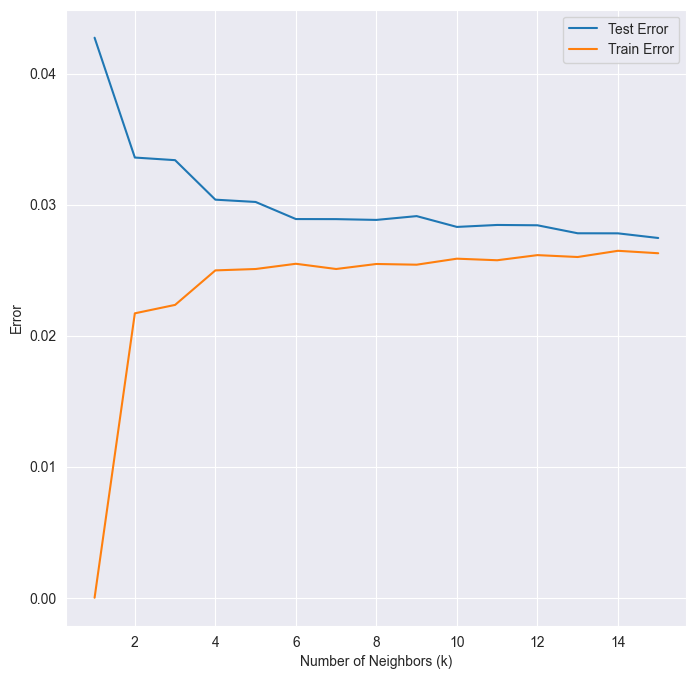

In [39]:
# ترسیم k در مقابل خطای آموزشی و خطای تست
plt.figure(figsize = (8, 8))

plt.xlabel("Number of Neighbors (k)")

plt.ylabel("Error")

plt.plot(kl, vl, label = 'Test Error')

plt.plot(kl, v2, label = 'Train Error')

plt.legend()

plt.show()

**مشاهده**:

- از نمودار بالا می توان گفت که K=15 مدل تعمیم یافته با خطاهای قطار و تست بسیار مشابه را به ما می دهد.